In [2]:
#######################################################################################################
#LINEAR REGRESSION
#Basic numpy, pandas and matplotlib imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn import metrics
from sklearn.linear_model import LinearRegression

#getting the directory
THIS_FOLDER = os.path.abspath('')


#setting the training and testing dataset path
class Dataset:
  train=os.path.join(THIS_FOLDER, 'wineQualityRed_train.csv')
  test=os.path.join(THIS_FOLDER, 'wineQualityRed_test.csv')

fields=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
fields1=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]

#X_TRAINING DATASET
train = pd.read_csv(Dataset.train, delimiter=';', header=None, skiprows=1,  names=fields)
#X_TESTING DATASET
test = pd.read_csv(Dataset.test, delimiter=';', header=None, skiprows=1,  names=fields)

train.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,10.6,0.28,0.39,15.5,0.069,6.0,23.0,1.0026,3.12,0.66,9.2,5
1,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.9964,3.15,0.92,11.7,8
2,10.6,0.36,0.59,2.2,0.152,6.0,18.0,0.9986,3.04,1.05,9.4,5
3,10.6,0.36,0.60,2.2,0.152,7.0,18.0,0.9986,3.04,1.06,9.4,5
4,10.6,0.44,0.68,4.1,0.114,6.0,24.0,0.9970,3.06,0.66,13.4,6


In [3]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5


In [4]:
############################################################################################################
##LINEAR REGRESSION FOR SINGLE ATTRIBUTE

 #considering only 'fixed acidity' attribute
x_train=train.iloc[:,0:1].values

y_train=train.iloc[:,-1].values
regressor = LinearRegression()
regressor.fit(x_train, y_train)

#taking all test data for regression
x_test=test.iloc[:,0:1].values
y_test=test.iloc[:,-1].values

#predict y for test data
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()


,Actual,Predicted
0,5,5.646777
1,5,5.657007
2,5,5.657007
3,6,5.743954
4,5,5.646777


Mean Squared Error: 0.5839186420366159
Intercept: 5.457538106303752
Slope: [0.02557288]
*********************************************************************
fixed acidity x_test vs y_pred


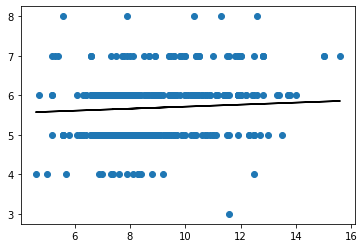

In [7]:

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

#intercept
print("Intercept:", regressor.intercept_)
#slope
print("Slope:", regressor.coef_)

#plot the values for fixed acidity feature
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='black')
print("*********************************************************************")
print("fixed acidity x_test vs y_pred")
plt.show()

In [8]:
########################################################################################################
##LINEAR REGRESSION FOR ALL ATTRIBUTES

x_train_all = np.array(train.drop(['quality'], axis=1))
y_train_all = np.array(train['quality'])

x_test_all = np.array(test.drop(['quality'], axis=1))
y_test_all = np.array(test['quality'])


regressor_all = LinearRegression()
regressor_all.fit(x_train_all,y_train_all)

#intercept
print("Intercept:", regressor_all.intercept_)
#slope
print("Slope:", regressor_all.coef_)

test_pred = regressor_all.predict(x_test_all)
print(test_pred[:10])

predicted_data = np.round_(test_pred)
print(predicted_data[:10])

Intercept: 31.741831140740295
Slope: [-5.73100144e-03 -1.07148926e+00 -6.30475021e-02  1.02337212e-02
 -1.94044757e+00  3.51582257e-03 -2.15501378e-03 -2.68912590e+01
 -6.34244261e-01  1.24194845e+00  2.67754540e-01]
[4.94084106 5.16790302 5.214698   5.64933519 4.94084106 4.97871927
 5.05868681 5.26228712 5.26138255 5.75318328]
[5. 5. 5. 6. 5. 5. 5. 5. 5. 6.]


In [4]:

#mean absolute, mean squared, and root mean squared error calculation

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_all, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_all, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_all, test_pred)))

Mean Absolute Error: 0.5224781243375761
Mean Squared Error: 0.4463021333444595
Root Mean Squared Error: 0.6680584804824047
